In [360]:
import pandas as pd
import numpy as np
import geopandas as gpd
import math

In [361]:
data = pd.read_csv("Ecommerce Customers.csv")

data_num = data[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]


In [362]:
#data.describe(include='all') #inkludiert auch kategorielle Variabeln 

In [363]:
#data_num.head(5)

In [364]:
#data.isnull().sum() #Überprüfung auf fehlende Werte je Spalte 

Adress analysis

In [365]:
list_shortcut_states = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY",]
state_list = []

for i in data["Address"]:
    if "Box" in i:
        index_to_drop = data[data["Address"] == i].index.values 
        data.drop(index_to_drop, inplace = True)
    else:
        state = i.split(",")[-1].split()[0]

        if state in list_shortcut_states:
            state_list.append(state)
        else:
            index_to_drop = data[data["Address"] == i].index.values 
            data.drop(index_to_drop, inplace = True)


data.drop(["Email","Avatar","Address"], inplace = True, axis = 1)
data.insert(5, "State", state_list)

data_mixed = data
data_mixed.index = range(len(data_mixed.index))

#print(data_mixed.head(5))
#print(data_mixed.State.value_counts())

states_and_customers_list = data_mixed.State.value_counts()
#print(type(states_and_customers_list))
print(states_and_customers_list.head(5))

SC    13
MO    13
DE    13
VT    12
OR    12
Name: State, dtype: int64


In [366]:
states = gpd.read_file("cb_2016_us_state_5m\cb_2016_us_state_5m.shp")
#print(states.head(10))

<AxesSubplot:>

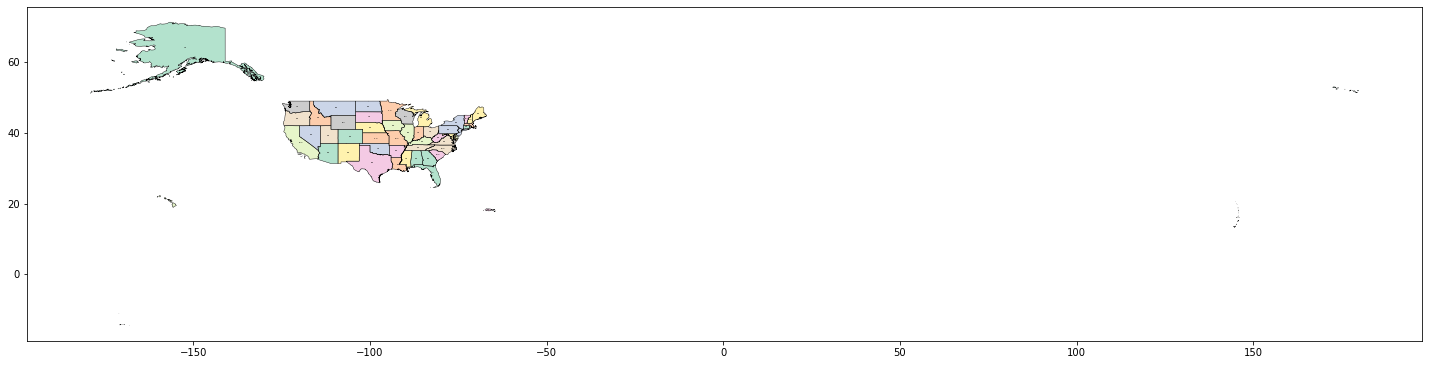

In [367]:
geo_list = []

for i in states["STUSPS"]:
    if i in states_and_customers_list:
        #print(states_and_customers_list[i], i)
        geo_list.append(states_and_customers_list[i])
    else:
        #print("BYE", 0)
        pass

VALUES = gpd.GeoDataFrame(geo_list)

usa = pd.concat([states, VALUES], axis=1)
usa.columns = ["STATEFP","STATENS","AFFGEOID","GEOID","STUSPS","NAME","LSAD","ALAND","AWATER","geometry","Customers"]
#print(usa.head(5))


fig = plt.figure(1, figsize=(25,15))
ax = fig.add_subplot()
usa.apply(lambda x: ax.annotate(s=x.Customers, xy=x.geometry.centroid.coords[0], ha='center', fontsize=2),axis=1)

"""usa.apply(lambda x: ax.annotate(s=x.Customers, xy= (x.geometry.centroid.coords[0][0], x.geometry.centroid.coords[0][1] - 10000 ),ha='center', color='#000077',fontsize=2),axis=1)"""

usa.boundary.plot(ax=ax, color='Black', linewidth=.4)
usa.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))


In [368]:
#states[states['NAME'] == 'Texas'].plot(figsize=(12, 12))